### Import libraries

In [25]:
import folium
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Read file and see how the dataframe looks like

In [3]:
df_covid = pd.read_csv('covid19.csv',sep=',')

In [4]:
df_covid.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-24,AC,Acrelândia,city,12,0,True,15256.0,1200013.0,78.65758,NaN
1,2020-04-24,AC,Bujari,city,1,0,True,10266.0,1200138.0,9.74089,NaN
2,2020-04-24,AC,Cruzeiro do Sul,city,5,0,True,88376.0,1200203.0,5.65764,NaN
3,2020-04-24,AC,Plácido de Castro,city,22,1,True,19761.0,1200385.0,111.33040,0.0455
4,2020-04-24,AC,Porto Acre,city,1,0,True,18504.0,1200807.0,5.40424,NaN


### Get the last data

In [7]:
df_covid = df_covid[df_covid['is_last'] == True]

### ANALYSIS PER STATE

### Group by state

In [14]:
df_grouped = df_covid.groupby('state').sum()

In [15]:
df_grouped.head()

,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
state,,,,,,,
AC,468,22,8.0,1464441.0,8402409.0,292.90190,0.1449
AL,826,54,27.0,5304423.0,67631668.0,220.23511,6.4494
AM,5776,468,37.0,7753202.0,46882308.0,1212.24261,4.9842
AP,1296,36,11.0,1635038.0,16003906.0,452.52947,0.0807
BA,3958,134,117.0,24059824.0,335329845.0,1468.61731,7.9967


### Calculate fatality rate per state (Deaths/Confirmed cases)

In [16]:
df_grouped['fatality_rate_per_state'] = df_grouped['deaths'] / df_grouped['confirmed']

In [17]:
df_grouped.drop('death_rate',axis=1,inplace=True)

In [18]:
df_grouped.head()

,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,fatality_rate_per_state
state,,,,,,,
AC,468,22,8.0,1464441.0,8402409.0,292.90190,0.047009
AL,826,54,27.0,5304423.0,67631668.0,220.23511,0.065375
AM,5776,468,37.0,7753202.0,46882308.0,1212.24261,0.081025
AP,1296,36,11.0,1635038.0,16003906.0,452.52947,0.027778
BA,3958,134,117.0,24059824.0,335329845.0,1468.61731,0.033855


### Drop columns that we are not going to use

In [19]:
df_grouped.drop('confirmed_per_100k_inhabitants',axis=1,inplace=True)

In [21]:
df_grouped.drop('city_ibge_code',axis=1,inplace=True)

In [23]:
df_grouped.drop('is_last',axis=1,inplace=True)

### Plot histogram of confirmed cases per state (Top 10)

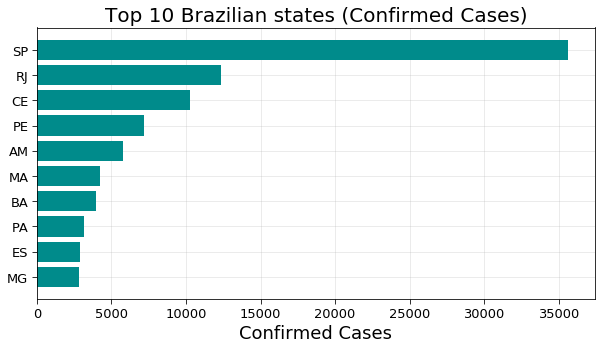

In [30]:
f = plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(df_grouped.sort_values('confirmed')['confirmed'].index[-10:],df_grouped.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Brazilian states (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

### Plot histogram of confirmed deaths per state (Top 10)

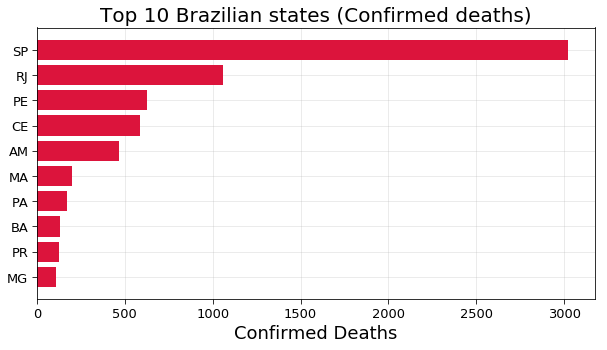

In [32]:
f = plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(df_grouped.sort_values('deaths')['deaths'].index[-10:],df_grouped.sort_values('deaths')["deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Deaths",fontsize=18)
plt.title("Top 10 Brazilian states (Confirmed deaths)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

### Plot histogram of fatality rate per state (Top 10)

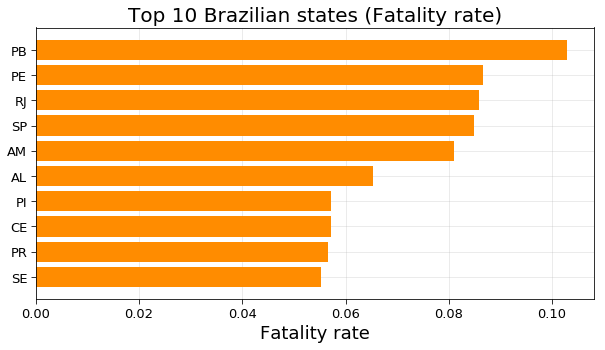

In [34]:
f = plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(df_grouped.sort_values('fatality_rate_per_state')['fatality_rate_per_state'].index[-10:],df_grouped.sort_values('fatality_rate_per_state')["fatality_rate_per_state"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Fatality rate",fontsize=18)
plt.title("Top 10 Brazilian states (Fatality rate)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

### Get latitude and longitude through an api

In [41]:
import requests

In [42]:
URL = 'http://open.mapquestapi.com/geocoding/v1/address'

In [66]:
latitudes = []
longitudes = []
for x in range(len(df_grouped)):
    location = df_grouped.index[x] + ",Brazil"
    PARAMS = {'key':'hMXCQiVHcV57r5zBgd2M9dWZOfoeeN3V','location': location}
    r = requests.get(url = URL, params = PARAMS) 
    latitude = r.json()['results'][0]['locations'][0]['latLng']['lat']
    longitude = r.json()['results'][0]['locations'][0]['latLng']['lng']
    latitudes.append(latitude)
    longitudes.append(longitude)

In [74]:
df_grouped.reset_index(inplace=True)

In [76]:
df_grouped['latitude'] = pd.Series(latitudes)
df_grouped['longitude'] = pd.Series(longitudes)

In [77]:
df_grouped.head()

,state,confirmed,deaths,estimated_population_2019,fatality_rate_per_state,latitude,longitude
0,AC,468,22,1464441.0,0.047009,-9.047868,-70.526498
1,AL,826,54,5304423.0,0.065375,-9.661166,-36.650243
2,AM,5776,468,7753202.0,0.081025,-4.479925,-63.518540
3,AP,1296,36,1635038.0,0.027778,1.354544,-51.916198
4,BA,3958,134,24059824.0,0.033855,-12.285251,-41.929478


### Plot Brazil map where radius is proportional to the number of confirmed cases

In [85]:
brazil_map = folium.Map(location=[-14,-51], tiles="cartodbpositron", zoom_start=3,max_zoom=6,min_zoom=2)
for i in range(0,len(df_grouped)):
    folium.Circle(
        location=[df_grouped.iloc[i]['latitude'], df_grouped.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_grouped.iloc[i]['state']+"</h5>"+
                    "<div style='text-align:center;'></div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_grouped.loc[i,'confirmed'])+"</li>"+
        "<li>Deaths:   "+str(df_grouped.loc[i,'deaths'])+"</li>"+
        "<li>Fatality Rate:   "+str(np.round(df_grouped.loc[i,'fatality_rate_per_state'],3))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_grouped.loc[i,'confirmed']+1.00001)))+0.2)*20000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(brazil_map)

brazil_map